In [63]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import re
import warnings
warnings.filterwarnings('ignore')
print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


All libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 1.26.4


In [65]:
# Load the CSV file
df = pd.read_csv('expense_dataset.csv')

# ✅ Fix category naming
df['category'] = df['category'].replace({'Cash & ATM': 'Cash & Utilities'})

print(f"\n✅ Dataset loaded successfully!")
print(f"Total expenses: {len(df)}")
print(f"\nFirst 10 rows:")
print(df.head(10))


print(f"\nDataset Info:")
print(f"Columns: {df.columns.tolist()}")
print(f"Shape: {df.shape}")
print(f"\nMissing values:")
print(df.isnull().sum())



✅ Dataset loaded successfully!
Total expenses: 395

First 10 rows:
  merchant_name                  description  amount       category
0     Starbucks  Coffee and muffin breakfast   10.50  Food & Dining
1        Subway             Chicken sub meal    9.75  Food & Dining
2     Pizza Hut        Large pepperoni pizza   22.00  Food & Dining
3    McDonald's          Big Mac lunch combo   14.25  Food & Dining
4           KFC         Fried chicken bucket   16.00  Food & Dining
5       Dominos         Pizza delivery order   20.00  Food & Dining
6   Burger King           Whopper combo meal   13.75  Food & Dining
7      Chipotle    Burrito bowl with chicken   11.25  Food & Dining
8     Taco Bell             Tacos and nachos    8.99  Food & Dining
9  Panera Bread      Sandwich and soup combo   12.50  Food & Dining

Dataset Info:
Columns: ['merchant_name', 'description', 'amount', 'category']
Shape: (395, 4)

Missing values:
merchant_name    0
description      0
amount           0
category       


📈 ANALYZING EXPENSE CATEGORIES

Expenses per category:
category
Food & Dining        54
Transportation       50
Shopping             50
Bills & Utilities    40
Business             31
Healthcare           30
Entertainment        30
Travel               30
Education            25
Personal Care        20
Cash & Utilities     20
Insurance            15
Name: count, dtype: int64


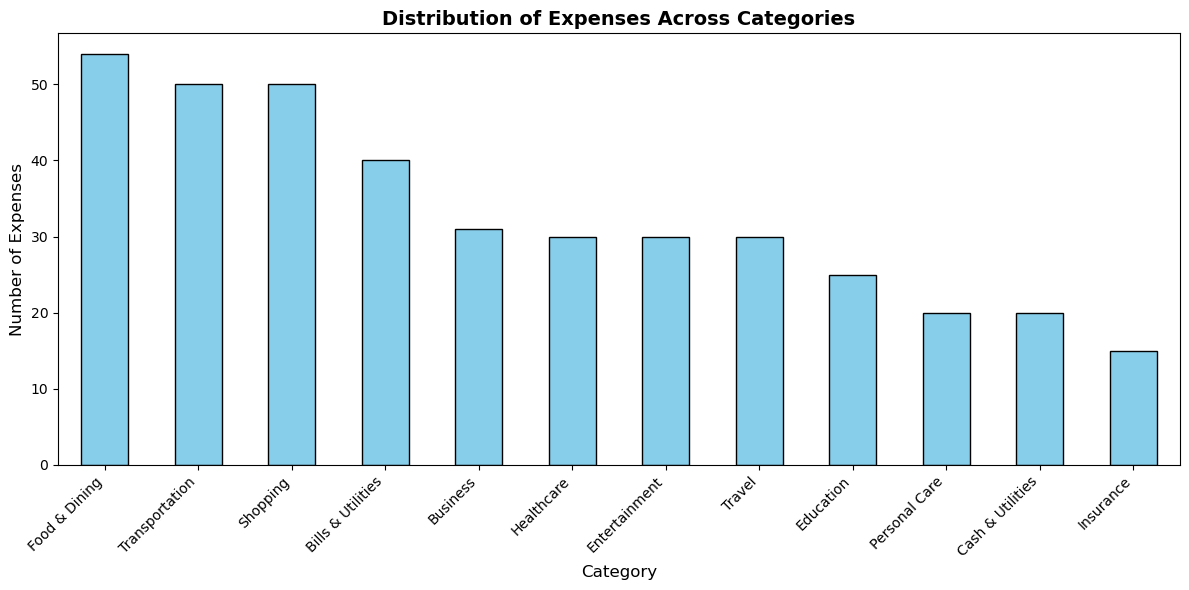


✅ Found 12 unique categories


In [67]:
print("\n" + "="*60)
print("📈 ANALYZING EXPENSE CATEGORIES")
print("="*60)

# Count expenses per category
category_counts = df['category'].value_counts()
print("\nExpenses per category:")
print(category_counts)

# Visualize category distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Expenses Across Categories', fontsize=14, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Expenses', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\n✅ Found {len(category_counts)} unique categories")


In [69]:
print("\n" + "="*60)
print("PREPROCESSING DATA")
print("="*60)

def preprocess_text(text):
    """Clean and prepare text for ML processing"""
    if pd.isna(text):
        return ""
    # Convert to lowercase
    text = str(text).lower()
    # Remove special characters
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    # Remove extra spaces
    text = ' '.join(text.split())
    return text

# Combine merchant name and description
df['combined_text'] = (df['merchant_name'].fillna('') + ' ' + 
                       df['description'].fillna(''))

# Clean the text
df['combined_text'] = df['combined_text'].apply(preprocess_text)

print("\nExample of preprocessed text:")
for i in range(5):
    print(f"\nOriginal: {df.iloc[i]['merchant_name']} - {df.iloc[i]['description']}")
    print(f"Processed: {df.iloc[i]['combined_text']}")

print("\nText preprocessing complete!")


PREPROCESSING DATA

Example of preprocessed text:

Original: Starbucks - Coffee and muffin breakfast
Processed: starbucks coffee and muffin breakfast

Original: Subway - Chicken sub meal
Processed: subway chicken sub meal

Original: Pizza Hut - Large pepperoni pizza
Processed: pizza hut large pepperoni pizza

Original: McDonald's - Big Mac lunch combo
Processed: mcdonald s big mac lunch combo

Original: KFC - Fried chicken bucket
Processed: kfc fried chicken bucket

Text preprocessing complete!


In [71]:
print("\n" + "="*60)
print("SPLITTING DATA FOR TRAINING AND TESTING")
print("="*60)

# Features (X) and Labels (y)
X = df['combined_text']
y = df['category']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split complete!")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"\nTraining set categories:")
print(y_train.value_counts())



SPLITTING DATA FOR TRAINING AND TESTING

Data split complete!
Training samples: 316
Testing samples: 79

Training set categories:
category
Food & Dining        43
Transportation       40
Shopping             40
Bills & Utilities    32
Business             25
Entertainment        24
Healthcare           24
Travel               24
Education            20
Cash & Utilities     16
Personal Care        16
Insurance            12
Name: count, dtype: int64


In [73]:
print("\n" + "="*60)
print("CONVERTING TEXT TO NUMERICAL FEATURES (TF-IDF)")
print("="*60)

# Create TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=6000,      # keep more words
    ngram_range=(1, 3),     # include single, double & triple words
    min_df=1,               # include even rare words
    sublinear_tf=True,      # smooth out large term frequencies
    stop_words='english'    # remove very common filler words
)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

print("✅ TF-IDF feature extraction complete!")
print("Feature matrix shape:", X_train_vec.shape)

# Show most important words
feature_names = vectorizer.get_feature_names_out()
print(f"\nExample features (words): {feature_names[:20]}")



CONVERTING TEXT TO NUMERICAL FEATURES (TF-IDF)
✅ TF-IDF feature extraction complete!
Feature matrix shape: (316, 1746)

Example features (words): ['2d' '2d movie' '3d' '3d booking' 'academy' 'academy donation'
 'academy donation learning' 'academy math' 'academy math lessons'
 'accessories' 'account' 'account maintenance' 'ad' 'ad free'
 'ad free videos' 'adobe' 'adobe creative' 'adobe creative cloud'
 'adobe illustrator' 'adobe illustrator license']


In [75]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n" + "="*60)
print("🤖 TRAINING LINEAR SVM MODEL")
print("="*60)

model = LinearSVC(C=1.0)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)

print(f"\n🎯 MODEL ACCURACY: {acc*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



🤖 TRAINING LINEAR SVM MODEL

🎯 MODEL ACCURACY: 91.14%

Classification Report:
                   precision    recall  f1-score   support

Bills & Utilities       0.78      0.88      0.82         8
         Business       1.00      0.67      0.80         6
 Cash & Utilities       1.00      1.00      1.00         4
        Education       1.00      1.00      1.00         5
    Entertainment       0.71      0.83      0.77         6
    Food & Dining       0.85      1.00      0.92        11
       Healthcare       1.00      0.83      0.91         6
        Insurance       1.00      1.00      1.00         3
    Personal Care       1.00      1.00      1.00         4
         Shopping       0.89      0.80      0.84        10
   Transportation       1.00      1.00      1.00        10
           Travel       1.00      1.00      1.00         6

         accuracy                           0.91        79
        macro avg       0.94      0.92      0.92        79
     weighted avg       0.92      


EVALUATING MODEL PERFORMANCE

MODEL ACCURACY: 91.14%

DETAILED CLASSIFICATION REPORT
                   precision    recall  f1-score   support

Bills & Utilities       0.78      0.88      0.82         8
         Business       1.00      0.67      0.80         6
 Cash & Utilities       1.00      1.00      1.00         4
        Education       1.00      1.00      1.00         5
    Entertainment       0.71      0.83      0.77         6
    Food & Dining       0.85      1.00      0.92        11
       Healthcare       1.00      0.83      0.91         6
        Insurance       1.00      1.00      1.00         3
    Personal Care       1.00      1.00      1.00         4
         Shopping       0.89      0.80      0.84        10
   Transportation       1.00      1.00      1.00        10
           Travel       1.00      1.00      1.00         6

         accuracy                           0.91        79
        macro avg       0.94      0.92      0.92        79
     weighted avg       0.9

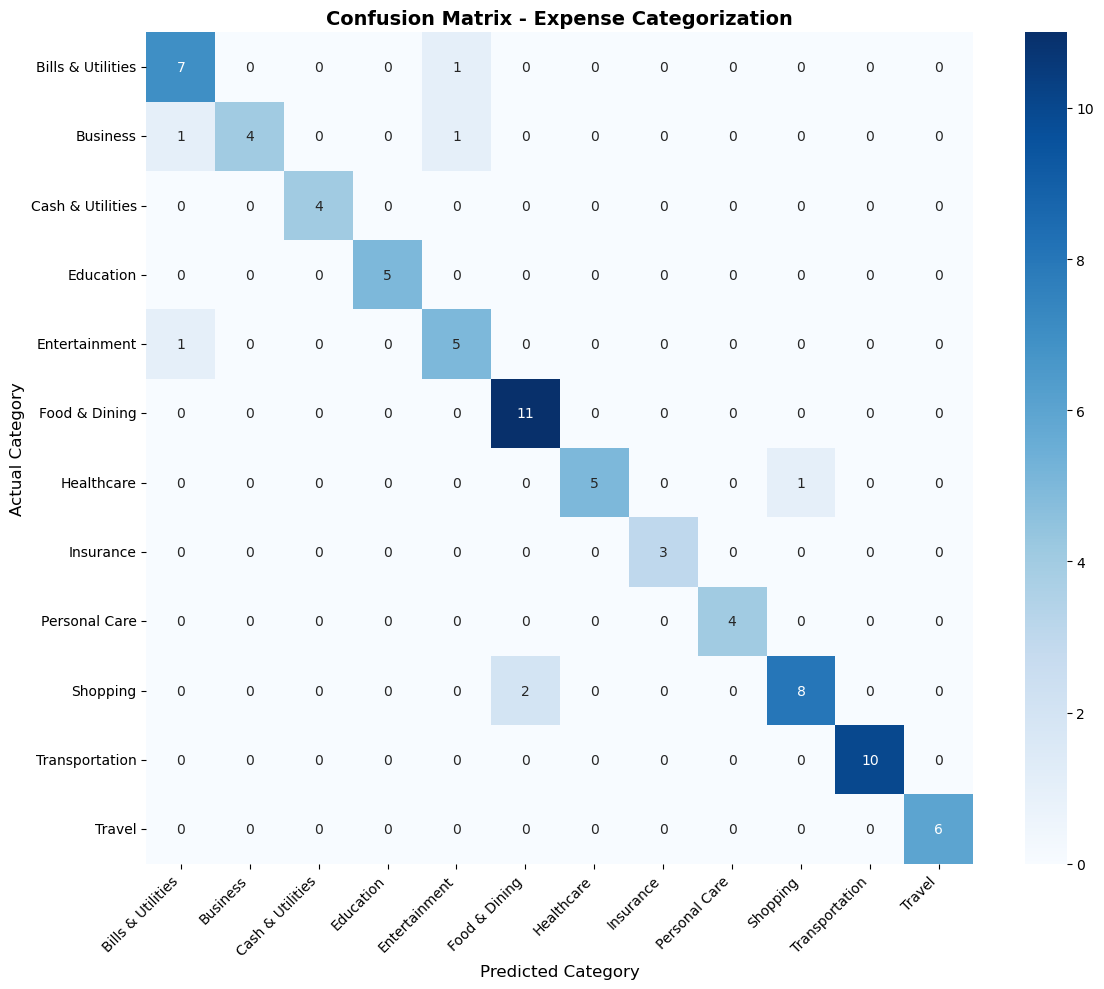

In [77]:
print("\n" + "="*60)
print("EVALUATING MODEL PERFORMANCE")
print("="*60)

# Make predictions on test set
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"\nMODEL ACCURACY: {accuracy * 100:.2f}%")
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\n" + "="*60)
print("CONFUSION MATRIX")
print("="*60)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, 
            yticklabels=model.classes_)
plt.title('Confusion Matrix - Expense Categorization', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Category', fontsize=12)
plt.ylabel('Actual Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [79]:
print("\n" + "="*60)
print("SAVING MODEL TO DISK")
print("="*60)

# Save model and vectorizer
model_data = {
    'vectorizer': vectorizer,
    'model': model,
    'categories': model.classes_.tolist(),
    'accuracy': accuracy
}

with open('expense_categorizer_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("✅ Model saved as 'expense_categorizer_model.pkl'")
print(f"Model accuracy: {accuracy * 100:.2f}%")


SAVING MODEL TO DISK
✅ Model saved as 'expense_categorizer_model.pkl'
Model accuracy: 91.14%


In [81]:
print("\n" + "="*60)
print("CREATING PREDICTION FUNCTION")
print("="*60)

def predict_expense_category(merchant_name, description="", amount=0):
    """
    Predict the category of an expense
    
    Args:
        merchant_name: Name of the merchant
        description: Description of the expense
        amount: Transaction amount
    
    Returns:
        Dictionary with prediction results
    """
    # Combine and preprocess text
    combined = f"{merchant_name} {description}"
    processed = preprocess_text(combined)
    
    # Vectorize
    vectorized = vectorizer.transform([processed])
    
    # Predict
    prediction = model.predict(vectorized)[0]
    probabilities = model.predict_proba(vectorized)[0]
    confidence = max(probabilities)
    
    # Get top 3 predictions
    top_3_indices = np.argsort(probabilities)[-3:][::-1]
    top_3_categories = [(model.classes_[i], probabilities[i]) for i in top_3_indices]
    
    return {
        'merchant': merchant_name,
        'description': description,
        'amount': amount,
        'predicted_category': prediction,
        'confidence': confidence,
        'top_3_predictions': top_3_categories
    }

print("Prediction function created!")



CREATING PREDICTION FUNCTION
Prediction function created!


In [85]:
# ===============================================
# CELL 11: Test with Sample Expenses (LinearSVC Compatible)
# ===============================================
print("\n" + "="*60)
print("🧪 TESTING WITH SAMPLE EXPENSES")
print("="*60)

# Test cases
test_expenses = [
    ("Starbucks", "Morning coffee", 5.50),
    ("Uber", "Ride to airport", 35.00),
    ("Amazon", "Books and laptop", 150.00),
    ("CVS Pharmacy", "Prescription medicine", 28.50),
    ("Netflix", "Monthly subscription", 15.99),
    ("Shell Gas Station", "Fuel", 45.00),
    ("Dr. Johnson", "Medical checkup", 120.00),
    ("AMC Theater", "Movie tickets", 30.00),
    ("Hilton Hotel", "Business stay", 200.00),
    ("Whole Foods", "Grocery shopping", 85.00)
]

print("\nTesting predictions:\n")

for merchant, desc, amount in test_expenses:
    combined = f"{merchant} {desc}"
    processed = preprocess_text(combined)
    vectorized = vectorizer.transform([processed])
    
    # Predict the main category
    prediction = model.predict(vectorized)[0]
    
    # Handle confidence and top-3 for LinearSVC
    if hasattr(model, "predict_proba"):
        # (In case you switch to SVC later)
        probabilities = model.predict_proba(vectorized)[0]
        confidence = max(probabilities)
        top_3_indices = np.argsort(probabilities)[-3:][::-1]
        top_3_categories = [(model.classes_[i], probabilities[i]) for i in top_3_indices]
    else:
        # Use decision_function for LinearSVC
        decision_scores = model.decision_function(vectorized)[0]
        confidence = abs(max(decision_scores)) / sum(abs(decision_scores))
        top_3_indices = np.argsort(decision_scores)[-3:][::-1]
        top_3_categories = [(model.classes_[i], decision_scores[i]) for i in top_3_indices]

    # Display results
    print(f"{'='*60}")
    print(f"🏪 Merchant: {merchant}")
    print(f"📝 Description: {desc}")
    print(f"💰 Amount: ${amount:.2f}")
    print(f"✅ Predicted Category: {prediction}")
    print(f"📊 Confidence (approx): {confidence*100:.1f}%")
    print(f"\nTop 3 Predictions:")
    for i, (cat, score) in enumerate(top_3_categories, 1):
        print(f"  {i}. {cat} (score: {score:.3f})")
    print()



🧪 TESTING WITH SAMPLE EXPENSES

Testing predictions:

🏪 Merchant: Starbucks
📝 Description: Morning coffee
💰 Amount: $5.50
✅ Predicted Category: Food & Dining
📊 Confidence (approx): 2.2%

Top 3 Predictions:
  1. Food & Dining (score: 0.227)
  2. Shopping (score: -0.871)
  3. Transportation (score: -0.901)

🏪 Merchant: Uber
📝 Description: Ride to airport
💰 Amount: $35.00
✅ Predicted Category: Transportation
📊 Confidence (approx): 1.4%

Top 3 Predictions:
  1. Transportation (score: 0.140)
  2. Travel (score: -0.216)
  3. Food & Dining (score: -0.980)

🏪 Merchant: Amazon
📝 Description: Books and laptop
💰 Amount: $150.00
✅ Predicted Category: Shopping
📊 Confidence (approx): 2.1%

Top 3 Predictions:
  1. Shopping (score: 0.218)
  2. Education (score: -0.768)
  3. Bills & Utilities (score: -0.784)

🏪 Merchant: CVS Pharmacy
📝 Description: Prescription medicine
💰 Amount: $28.50
✅ Predicted Category: Healthcare
📊 Confidence (approx): 5.9%

Top 3 Predictions:
  1. Healthcare (score: 0.670)
  2.

In [95]:
print("\n" + "="*60)
print("🎮 INTERACTIVE PREDICTION - TRY YOUR OWN!")
print("="*60)

# You can modify these values and run this cell multiple times
YOUR_MERCHANT = "McDonald's"  
YOUR_DESCRIPTION = "Lunch" 
YOUR_AMOUNT = 12.50  

# Combine and preprocess
combined = f"{YOUR_MERCHANT} {YOUR_DESCRIPTION}"
processed = preprocess_text(combined)
vectorized = vectorizer.transform([processed])

# Predict
prediction = model.predict(vectorized)[0]

# Handle probabilities or decision scores depending on model
if hasattr(model, "predict_proba"):
    probabilities = model.predict_proba(vectorized)[0]
    confidence = max(probabilities)
    top_3_indices = np.argsort(probabilities)[-3:][::-1]
    top_3_categories = [(model.classes_[i], probabilities[i]) for i in top_3_indices]
else:
    decision_scores = model.decision_function(vectorized)[0]
    confidence = abs(max(decision_scores)) / sum(abs(decision_scores))
    top_3_indices = np.argsort(decision_scores)[-3:][::-1]
    top_3_categories = [(model.classes_[i], decision_scores[i]) for i in top_3_indices]

# Display results
print(f"\n{'='*60}")
print(f"🏪 Merchant: {YOUR_MERCHANT}")
print(f"📝 Description: {YOUR_DESCRIPTION}")
print(f"💰 Amount: ${YOUR_AMOUNT:.2f}")
print(f"✅ Predicted Category: {prediction}")
print(f"📊 Confidence (approx): {confidence*100:.1f}%")
print(f"\nTop 3 Predictions:")
for i, (cat, score) in enumerate(top_3_categories, 1):
    print(f"  {i}. {cat} (score: {score:.3f})")
print(f"{'='*60}")



🎮 INTERACTIVE PREDICTION - TRY YOUR OWN!

🏪 Merchant: McDonald's
📝 Description: Lunch
💰 Amount: $12.50
✅ Predicted Category: Food & Dining
📊 Confidence (approx): 0.7%

Top 3 Predictions:
  1. Food & Dining (score: -0.071)
  2. Transportation (score: -0.652)
  3. Shopping (score: -0.854)


In [89]:
# ===============================================
# CELL 13: Model Performance Summary
# ===============================================
print("\n" + "="*60)
print("📋 FINAL MODEL SUMMARY")
print("="*60)

print(f"""
✅ Model Type: Linear Support Vector Machine (LinearSVC)
✅ Feature Extraction: TF-IDF Vectorization
✅ Training Data: {len(df)} expenses
✅ Categories: {len(model.classes_)}
✅ Accuracy: {accuracy * 100:.2f}%
✅ Model Status: Trained and Ready 🚀

📊 Categories Supported:
""")

for i, cat in enumerate(sorted(model.classes_), 1):
    print(f"   {i}. {cat}")

print(f"\n💾 Model saved to: expense_categorizer_model.pkl")
print(f"✅ Ready for integration with OCR module!")



📋 FINAL MODEL SUMMARY

✅ Model Type: Linear Support Vector Machine (LinearSVC)
✅ Feature Extraction: TF-IDF Vectorization
✅ Training Data: 395 expenses
✅ Categories: 12
✅ Accuracy: 91.14%
✅ Model Status: Trained and Ready 🚀

📊 Categories Supported:

   1. Bills & Utilities
   2. Business
   3. Cash & Utilities
   4. Education
   5. Entertainment
   6. Food & Dining
   7. Healthcare
   8. Insurance
   9. Personal Care
   10. Shopping
   11. Transportation
   12. Travel

💾 Model saved to: expense_categorizer_model.pkl
✅ Ready for integration with OCR module!


In [91]:
print("\n" + "="*60)
print("🔌 API-READY FUNCTION FOR INTEGRATION")
print("="*60)

def categorize_for_api(ocr_data):
    """
    Function that can be called by your teammate's OCR module (OCR → Expense Categorization)
    
    Input format (from OCR):
    {
        'merchant_name': 'Starbucks',
        'description': 'Coffee',
        'amount': 5.50,
        'date': '2024-11-11'
    }
    
    Output format:
    {
        'category': 'Food & Dining'
    }
    """
    merchant = ocr_data.get('merchant_name', '')
    description = ocr_data.get('description', '')
    amount = ocr_data.get('amount', 0)

    # Combine merchant and description
    combined = f"{merchant} {description}"
    processed = preprocess_text(combined)
    
    # Vectorize input
    vectorized = vectorizer.transform([processed])
    
    # Predict using LinearSVC
    prediction = model.predict(vectorized)[0]
    
    return {
        'category': prediction,
        'amount': amount
    }

# Test the API function
print("Testing API function:\n")
sample_ocr_output = {
    'merchant_name': 'Walmart',
    'description': 'Weekly groceries',
    'amount': 120.00,
    'date': '2024-11-11'
}

api_result = categorize_for_api(sample_ocr_output)
print(f"OCR Input: {sample_ocr_output}")
print(f"\nCategorization Output: {api_result}")
print("\n✅ API function ready for integration!")



🔌 API-READY FUNCTION FOR INTEGRATION
Testing API function:

OCR Input: {'merchant_name': 'Walmart', 'description': 'Weekly groceries', 'amount': 120.0, 'date': '2024-11-11'}

Categorization Output: {'category': 'Shopping', 'amount': 120.0}

✅ API function ready for integration!



📊 VISUALIZING MODEL PREDICTIONS


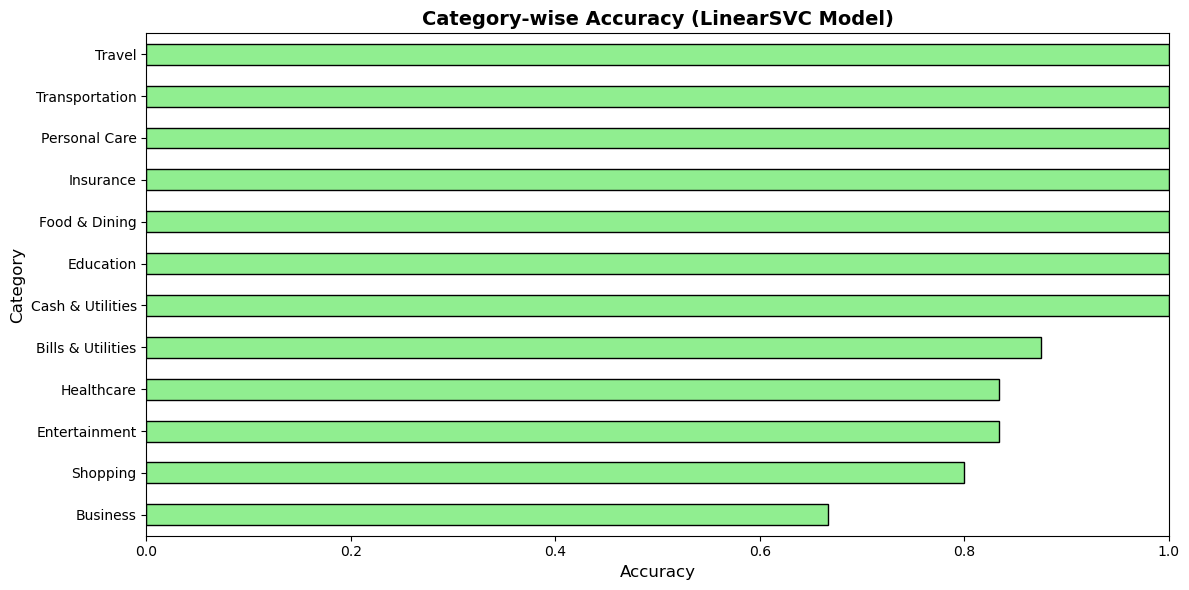

Visualization complete!


In [93]:
print("\n" + "="*60)
print("📊 VISUALIZING MODEL PREDICTIONS")
print("="*60)

# Get predictions on test set
y_pred = model.predict(X_test_vec)

# Compare actual vs predicted
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Count correct predictions per category
correct_counts = comparison[comparison['Actual'] == comparison['Predicted']]['Actual'].value_counts()
total_counts = y_test.value_counts()
accuracy_per_category = (correct_counts / total_counts).fillna(0)

# Plot accuracy per category
plt.figure(figsize=(12, 6))
accuracy_per_category.sort_values().plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Category-wise Accuracy (LinearSVC Model)', fontsize=14, fontweight='bold')
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

print("Visualization complete!")


In [97]:
ocr_output = {
    'merchant_name': 'Dominos',
    'description': 'Veg pizza and cold drink',
    'amount': 450
}

category_result = categorize_for_api(ocr_output)
print(category_result)


{'category': 'Food & Dining', 'amount': 450}
